Importa as bibliotecas necessárias para o pré-processamento do Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

Carrega o Dataset bruto

In [4]:
df_prop = pd.read_excel('Dataset.xlsx')

Visualiza informações básicas do conteúdo do Dataset

In [5]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46319 entries, 0 to 46318
Data columns (total 3 columns):
ANO_PROPOSICAO                  46319 non-null int64
AREAS_TEMATICAS_APRESENTACAO    46319 non-null object
TEXTO                           46319 non-null object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
df_prop.head(7)

,ANO_PROPOSICAO,AREAS_TEMATICAS_APRESENTACAO,TEXTO
0,2003,"INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR (UT...",Dispõe sobre o prazo para devolução de encomen...
1,2003,ARTE E CULTURA,Confere ao município de Passo Fundo o título d...
2,2003,ARTE E CULTURA,Inscreve o nome de Heitor Villa-Lobos no Livro...
3,2003,TRIBUTACAO,Dispõe sobre a isenção do Imposto sobre Produt...
4,2004,SEGURANCA PUBLICA,"""Autoriza o uso, pelas Polícias Civil e Milita..."
5,2003,"ECONOMIA, ADMINISTRACAO FINANCEIRA E ORCAMENTA...",Acrescenta dispositivo à Lei Complementar nº 1...
6,2003,EDUCACAO,Dá nova redação ao art. 208 da Constituição Fe...


Simplifica nome de colunas do Dataset

In [7]:
df_prop.rename(columns={'ANO_PROPOSICAO': 'ANO', 'AREAS_TEMATICAS_APRESENTACAO': 'TEMAS'}, inplace=True)
df_prop.head(3)

,ANO,TEMAS,TEXTO
0,2003,"INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR (UT...",Dispõe sobre o prazo para devolução de encomen...
1,2003,ARTE E CULTURA,Confere ao município de Passo Fundo o título d...
2,2003,ARTE E CULTURA,Inscreve o nome de Heitor Villa-Lobos no Livro...


Identifica a quantidade total de temas presentes no Dataset

In [8]:
df_prop['TEMAS'].nunique()

585

Conta a quantidade de entradas para cada tema, remove temas que aparecem menos que 100 vezes no Dataset e reorganiza o index numérico.

In [9]:
counts = df_prop['TEMAS'].value_counts()
df_prop = df_prop[df_prop['TEMAS'].isin(counts[counts > 100].index)]
df_prop.reset_index(drop = True, inplace = True)
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38971 entries, 0 to 38970
Data columns (total 3 columns):
ANO      38971 non-null int64
TEMAS    38971 non-null object
TEXTO    38971 non-null object
dtypes: int64(1), object(2)
memory usage: 913.5+ KB


Verifica a quantidade de temas existentes no Dataset

In [10]:
df_prop['TEMAS'].nunique()

45

Elimina o texto "(UTILIZADO ATE A LEGISLATURA 53)" existente em diversos nomes de temas para melhorar visualização e operação com os temas.

In [11]:
for index, tema in df_prop.iterrows():
    legis_53 = '(UTILIZADO ATE A LEGISLATURA 53)'
    if legis_53 in tema['TEMAS']:
        tema_processado = tema['TEMAS'].replace(legis_53, '')
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_processado

In [12]:
df_prop.head(5)

,ANO,TEMAS,TEXTO
0,2003,"INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR",Dispõe sobre o prazo para devolução de encomen...
1,2003,ARTE E CULTURA,Confere ao município de Passo Fundo o título d...
2,2003,ARTE E CULTURA,Inscreve o nome de Heitor Villa-Lobos no Livro...
3,2003,TRIBUTACAO,Dispõe sobre a isenção do Imposto sobre Produt...
4,2004,SEGURANCA PUBLICA,"""Autoriza o uso, pelas Polícias Civil e Milita..."


In [13]:
df_prop.to_excel('Dataset_processed.xlsx',sheet_name='Dataset')

Revalida quantos temas ainda existem no Dataset após a limpeza

In [14]:
df_prop['TEMAS'].nunique()

45

Mostra a quantidade de entradas para cada um dos temas restantes após a limpeza

In [15]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                                               8466
TRABALHO E EMPREGO                                                         2455
ADMINISTRACAO PUBLICA                                                      2356
EDUCACAO                                                                   2073
TRIBUTACAO                                                                 2056
DIREITO PENAL E PROCESSUAL PENAL                                           1788
SAUDE                                                                      1539
DIREITOS HUMANOS, MINORIAS E CIDADANIA                                     1439
VIACAO E TRANSPORTES                                                       1359
HOMENAGENS E DATAS COMEMORATIVAS                                           1219
DIREITO CIVIL E PROCESSUAL CIVIL                                           1218
DESENVOLVIMENTO URBANO E TRANSITO                                          1053
ORGANIZACAO POLITICO ADMINISTRATIVA DO E

Une todas as subcategorias do tema DIREITOS HUMANOS, MINORIAS E CIDADANIA em um único grande grupo

In [16]:
for index, tema in df_prop.iterrows():
    tema_chave = 'DIREITOS HUMANOS, MINORIAS E CIDADANIA'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_chave

Realiza recontagem de temas após a união dos temas de DIREITOS HUMANOS, MINORIAS E CIDADANIA

In [17]:
df_prop['TEMAS'].nunique()

39

In [18]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                              8466
TRABALHO E EMPREGO                                        2455
DIREITOS HUMANOS, MINORIAS E CIDADANIA                    2439
ADMINISTRACAO PUBLICA                                     2356
EDUCACAO                                                  2073
TRIBUTACAO                                                2056
DIREITO PENAL E PROCESSUAL PENAL                          1788
SAUDE                                                     1539
VIACAO E TRANSPORTES                                      1359
HOMENAGENS E DATAS COMEMORATIVAS                          1219
DIREITO CIVIL E PROCESSUAL CIVIL                          1218
DESENVOLVIMENTO URBANO E TRANSITO                         1053
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO             1023
PREVIDENCIA E ASSISTENCIA SOCIAL                          1005
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR                 961
SEGURANCA PUBLICA                                      

In [19]:
for index, tema in df_prop.iterrows():
    tema_chave = 'PREVIDENCIA E ASSISTENCIA SOCIAL'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_chave

In [20]:
df_prop['TEMAS'].nunique()

38

In [21]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                              8466
TRABALHO E EMPREGO                                        2455
DIREITOS HUMANOS, MINORIAS E CIDADANIA                    2439
ADMINISTRACAO PUBLICA                                     2356
EDUCACAO                                                  2073
TRIBUTACAO                                                2056
DIREITO PENAL E PROCESSUAL PENAL                          1788
SAUDE                                                     1539
VIACAO E TRANSPORTES                                      1359
HOMENAGENS E DATAS COMEMORATIVAS                          1219
DIREITO CIVIL E PROCESSUAL CIVIL                          1218
PREVIDENCIA E ASSISTENCIA SOCIAL                          1125
DESENVOLVIMENTO URBANO E TRANSITO                         1053
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO             1023
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR                 961
SEGURANCA PUBLICA                                      

In [22]:
for index, tema in df_prop.iterrows():
    tema_chave = 'INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_chave

In [23]:
df_prop['TEMAS'].nunique()

36

In [24]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                          8466
TRABALHO E EMPREGO                                    2455
DIREITOS HUMANOS, MINORIAS E CIDADANIA                2439
ADMINISTRACAO PUBLICA                                 2356
EDUCACAO                                              2073
TRIBUTACAO                                            2056
DIREITO PENAL E PROCESSUAL PENAL                      1788
SAUDE                                                 1539
VIACAO E TRANSPORTES                                  1359
HOMENAGENS E DATAS COMEMORATIVAS                      1219
DIREITO CIVIL E PROCESSUAL CIVIL                      1218
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            1183
PREVIDENCIA E ASSISTENCIA SOCIAL                      1125
DESENVOLVIMENTO URBANO E TRANSITO                     1053
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         1023
SEGURANCA PUBLICA                                      960
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL            7

In [25]:
for index, tema in df_prop.iterrows():
    tema_chave = 'ORGANIZACAO ADMINISTRATIVA DO ESTADO'
    tema_alvo = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_alvo

In [26]:
df_prop['TEMAS'].nunique()

36

In [27]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                          8466
TRABALHO E EMPREGO                                    2455
DIREITOS HUMANOS, MINORIAS E CIDADANIA                2439
ADMINISTRACAO PUBLICA                                 2356
EDUCACAO                                              2073
TRIBUTACAO                                            2056
DIREITO PENAL E PROCESSUAL PENAL                      1788
SAUDE                                                 1539
VIACAO E TRANSPORTES                                  1359
HOMENAGENS E DATAS COMEMORATIVAS                      1219
DIREITO CIVIL E PROCESSUAL CIVIL                      1218
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            1183
PREVIDENCIA E ASSISTENCIA SOCIAL                      1125
DESENVOLVIMENTO URBANO E TRANSITO                     1053
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         1023
SEGURANCA PUBLICA                                      960
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL            7

In [28]:
df_prop['TEMAS'].unique()

array(['INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR', 'ARTE E CULTURA',
       'TRIBUTACAO', 'SEGURANCA PUBLICA', 'EDUCACAO',
       'PROCESSO LEGISLATIVO', 'DIREITO CIVIL E PROCESSUAL CIVIL',
       'DIREITOS HUMANOS, MINORIAS E CIDADANIA',
       'MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL',
       'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO ',
       'DIREITO PENAL E PROCESSUAL PENAL',
       'PREVIDENCIA E ASSISTENCIA SOCIAL', 'ADMINISTRACAO PUBLICA',
       'VIACAO E TRANSPORTES', 'DESPORTO E LAZER', 'TRABALHO E EMPREGO',
       'ECONOMIA, ADMINISTRACAO FINANCEIRA E ORCAMENTARIA ', 'SAUDE',
       'DESENVOLVIMENTO REGIONAL', 'COMUNICACOES', 'POLITICA FUNDIARIA',
       'RECURSOS HIDRICOS, MINERAIS E POLITICA ENERGETICA',
       'SAUDE,TRABALHO E EMPREGO', 'DEFESA E SEGURANCA NACIONAL',
       'DESENVOLVIMENTO URBANO E TRANSITO',
       'ORGANIZACAO POLITICA, PARTIDARIA E ELEITORAL',
       'RELACOES INTERNACIONAIS', 'HOMENAGENS E DATAS COMEMORATIVAS',
       'ADMINISTRACAO PUBL

In [29]:
for index, tema in df_prop.iterrows():
    tema_chave = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO '
    tema_alvo = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_alvo

In [30]:
df_prop['TEMAS'].nunique()

35

In [31]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                          8466
TRABALHO E EMPREGO                                    2455
DIREITOS HUMANOS, MINORIAS E CIDADANIA                2439
ADMINISTRACAO PUBLICA                                 2356
EDUCACAO                                              2073
TRIBUTACAO                                            2056
DIREITO PENAL E PROCESSUAL PENAL                      1788
SAUDE                                                 1539
VIACAO E TRANSPORTES                                  1359
HOMENAGENS E DATAS COMEMORATIVAS                      1219
DIREITO CIVIL E PROCESSUAL CIVIL                      1218
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            1183
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         1168
PREVIDENCIA E ASSISTENCIA SOCIAL                      1125
DESENVOLVIMENTO URBANO E TRANSITO                     1053
SEGURANCA PUBLICA                                      960
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL            7

In [32]:
for index, tema in df_prop.iterrows():
    tema_chave = 'ADMINISTRACAO PUBLICA'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_chave

In [33]:
df_prop['TEMAS'].nunique()

34

In [34]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                          8466
ADMINISTRACAO PUBLICA                                 2459
TRABALHO E EMPREGO                                    2455
DIREITOS HUMANOS, MINORIAS E CIDADANIA                2439
EDUCACAO                                              2073
TRIBUTACAO                                            2056
DIREITO PENAL E PROCESSUAL PENAL                      1788
SAUDE                                                 1539
VIACAO E TRANSPORTES                                  1359
HOMENAGENS E DATAS COMEMORATIVAS                      1219
DIREITO CIVIL E PROCESSUAL CIVIL                      1218
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            1183
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         1168
PREVIDENCIA E ASSISTENCIA SOCIAL                      1125
DESENVOLVIMENTO URBANO E TRANSITO                     1053
SEGURANCA PUBLICA                                      960
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL            7

In [35]:
for index, tema in df_prop.iterrows():
    tema_chave = 'EDUCACAO'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_chave

In [36]:
for index, tema in df_prop.iterrows():
    tema_chave = 'TRABALHO E EMPREGO'
    if tema_chave in tema['TEMAS']:
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_chave

In [37]:
df_prop['TEMAS'].nunique()

32

In [38]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                          8466
TRABALHO E EMPREGO                                    2575
ADMINISTRACAO PUBLICA                                 2459
DIREITOS HUMANOS, MINORIAS E CIDADANIA                2439
EDUCACAO                                              2178
TRIBUTACAO                                            2056
DIREITO PENAL E PROCESSUAL PENAL                      1788
SAUDE                                                 1539
VIACAO E TRANSPORTES                                  1359
HOMENAGENS E DATAS COMEMORATIVAS                      1219
DIREITO CIVIL E PROCESSUAL CIVIL                      1218
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            1183
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         1168
PREVIDENCIA E ASSISTENCIA SOCIAL                      1125
DESENVOLVIMENTO URBANO E TRANSITO                     1053
SEGURANCA PUBLICA                                      960
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL            7

In [39]:
df_prop.to_excel('Dataset_processed.xlsx',sheet_name='Dataset')

In [40]:
df_prop.sort_values(by='TEMAS', ascending=True, inplace=True)

In [41]:
df_prop.describe()

,ANO
count,38971.000000
mean,2008.586821
std,4.355916
min,2002.000000
25%,2004.000000
50%,2009.000000
75%,2012.000000
max,2016.000000


In [42]:
df_prop.count()

ANO      38971
TEMAS    38971
TEXTO    38971
dtype: int64

Visualiza a distribuição das entradas entre os TEMAS

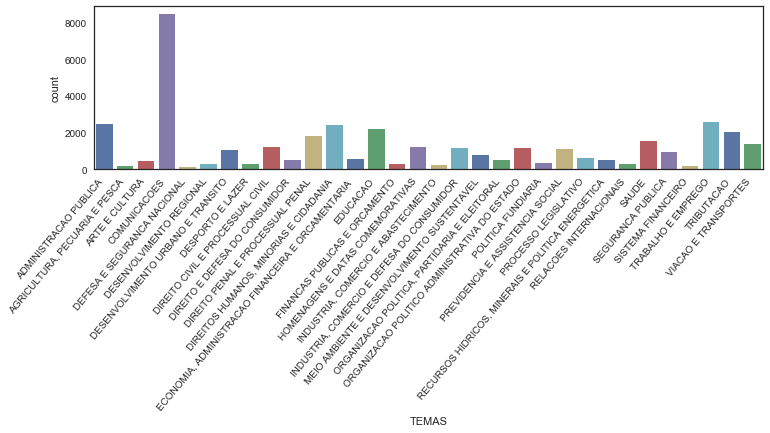

In [43]:
sns.set_context("notebook")
sns.set_style('white')
plt.figure(figsize=(12,3))
countplot = sns.countplot(x=df_prop['TEMAS'], data=df_prop, palette='deep')
plt.setp(countplot.get_xticklabels(), rotation=50, ha="right")
countplot

Verifica distribuição das entradas

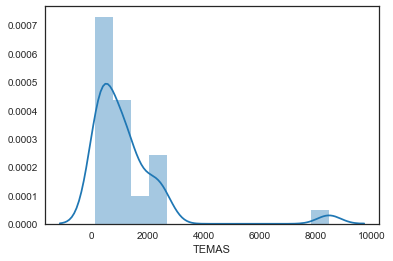

In [44]:
sns.distplot(df_prop['TEMAS'].value_counts())

Verifica se há alguma correlação entre ANO e TEMAS

In [45]:
corr_df_prop = df_prop.copy()
corr_df_prop['ALVO'] = df_prop['TEMAS']
corr_df_prop.ALVO = pd.Categorical(corr_df_prop.ALVO)
corr_df_prop['ALVO'] = corr_df_prop.ALVO.cat.codes
corr_df_prop.corr()

,ANO,ALVO
ANO,1.000000,0.062668
ALVO,0.062668,1.000000


In [46]:
df_prop['TEXTO'].nunique()

37378

In [47]:
d_count = 0
d_list = df_prop['TEXTO'].duplicated()
d_list.dtype

dtype('bool')

Carrega arquivo do dataset que teve o texto já processado e tokenizado para análise

In [48]:
df_tokenized = pd.read_excel('Processed_File.xlsx')

In [49]:
df_tokenized['TOKENIZED'].describe()

count                              30505
unique                             26399
top        dá nov red art constitu feder
freq                                  91
Name: TOKENIZED, dtype: object

In [50]:
df_tokenized['TEMAS'].value_counts(normalize=True) * 100

TRABALHO E EMPREGO                                    8.441239
ADMINISTRACAO PUBLICA                                 8.060974
DIREITOS HUMANOS, MINORIAS E CIDADANIA                7.995411
EDUCACAO                                              7.139813
TRIBUTACAO                                            6.739879
DIREITO PENAL E PROCESSUAL PENAL                      5.861334
SAUDE                                                 5.045075
VIACAO E TRANSPORTES                                  4.455007
HOMENAGENS E DATAS COMEMORATIVAS                      3.996066
DIREITO CIVIL E PROCESSUAL CIVIL                      3.992788
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            3.878053
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         3.828881
PREVIDENCIA E ASSISTENCIA SOCIAL                      3.687920
DESENVOLVIMENTO URBANO E TRANSITO                     3.451893
SEGURANCA PUBLICA                                     3.147025
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL           2

Pegas os indices de todas as entradas que estão duplicadas no dataset

In [51]:
duplicated_entries = []
for idx, v in df_tokenized.duplicated(subset='TOKENIZED', keep='first').iteritems():
    if v is True:
        duplicated_entries.append(idx)

Remove os itens duplicados do dataset

In [52]:
for idx, values in df_tokenized.iterrows():
    if idx in duplicated_entries:
        df_tokenized.drop(labels=idx, axis=0, inplace=True)

In [53]:
df_tokenized['TOKENIZED'].describe()

count                                                 26399
unique                                                26399
top        alt lei nº julh reduz alíquot contribu cofim ...
freq                                                      1
Name: TOKENIZED, dtype: object

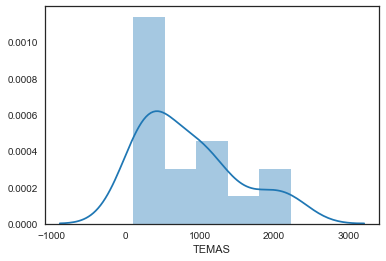

In [54]:
sns.distplot(df_tokenized['TEMAS'].value_counts())

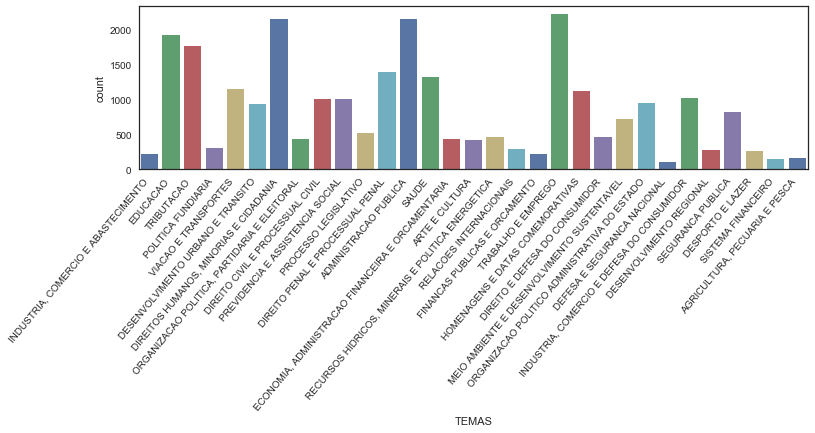

In [55]:
sns.set_context("notebook")
sns.set_style('white')
plt.figure(figsize=(12,3))
countplot = sns.countplot(x=df_tokenized['TEMAS'], data=df_tokenized, palette='deep')
plt.setp(countplot.get_xticklabels(), rotation=50, ha="right")
countplot

Distribuição em % dos TEMAS após limpeza de entradas duplicadas
Resultado: Ainda há uma discrepância grande entre representatividade das classes

In [56]:
df_tokenized['TEMAS'].value_counts(normalize=True) * 100

TRABALHO E EMPREGO                                    8.435926
DIREITOS HUMANOS, MINORIAS E CIDADANIA                8.148036
ADMINISTRACAO PUBLICA                                 8.136672
EDUCACAO                                              7.295731
TRIBUTACAO                                            6.697223
DIREITO PENAL E PROCESSUAL PENAL                      5.288079
SAUDE                                                 5.007765
VIACAO E TRANSPORTES                                  4.363802
HOMENAGENS E DATAS COMEMORATIVAS                      4.227433
INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR            3.867571
DIREITO CIVIL E PROCESSUAL CIVIL                      3.837267
PREVIDENCIA E ASSISTENCIA SOCIAL                      3.822114
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         3.575893
DESENVOLVIMENTO URBANO E TRANSITO                     3.545589
SEGURANCA PUBLICA                                     3.121330
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL           2

**A seguir será analisado a correlação de outras variáveis com os TEMAS:**

Correlação de variáveis adicionais com TEMAS:

Carrega o dataset com oas novas variáveis

In [65]:
dataset_full = pd.read_excel('dataset_full_feats.xlsx')

Transformando as variáveis categóricas textuais em códigos para que possa ser calculado a correlação entre elas

In [71]:
corr_df_prop = dataset_full.copy()
#Categorização e correlação de SEXO
corr_df_prop['CAT_SEXO'] = dataset_full['SEXO']
corr_df_prop.CAT_SEXO = pd.Categorical(corr_df_prop.CAT_SEXO)
corr_df_prop['CAT_SEXO'] = corr_df_prop.CAT_SEXO.cat.codes
#Categorização e correlação de TEMAS
corr_df_prop['CAT_TEMAS'] = dataset_full['TEMAS']
corr_df_prop.CAT_TEMAS = pd.Categorical(corr_df_prop.CAT_TEMAS)
corr_df_prop['CAT_TEMAS'] = corr_df_prop.CAT_TEMAS.cat.codes
#Categorização e correlação de POLITICO
corr_df_prop['CAT_POLITICO'] = dataset_full['POLITICO']
corr_df_prop.CAT_POLITICO = pd.Categorical(corr_df_prop.CAT_POLITICO)
corr_df_prop['CAT_POLITICO'] = corr_df_prop.CAT_POLITICO.cat.codes
#Categorização e correlação de PARTIDO
corr_df_prop['CAT_PARTIDO'] = dataset_full['PARTIDO']
corr_df_prop.CAT_PARTIDO = pd.Categorical(corr_df_prop.CAT_PARTIDO)
corr_df_prop['CAT_PARTIDO'] = corr_df_prop.CAT_PARTIDO.cat.codes
#Categorização e correlação de UF
corr_df_prop['CAT_UF'] = dataset_full['UF']
corr_df_prop.CAT_UF = pd.Categorical(corr_df_prop.CAT_UF)
corr_df_prop['CAT_UF'] = corr_df_prop.CAT_UF.cat.codes
#Categorização e correlação de REGIAO
corr_df_prop['CAT_REGIAO'] = dataset_full['REGIAO']
corr_df_prop.CAT_REGIAO = pd.Categorical(corr_df_prop.CAT_REGIAO)
corr_df_prop['CAT_REGIAO'] = corr_df_prop.CAT_REGIAO.cat.codes
#Categorização e correlação de TEXTO
corr_df_prop['CAT_TEXTO'] = dataset_full['TEXTO']
corr_df_prop.CAT_TEXTO = pd.Categorical(corr_df_prop.CAT_TEXTO)
corr_df_prop['CAT_TEXTO'] = corr_df_prop.CAT_TEXTO.cat.codes
#Exibe a correlação:
corr_df_prop.corr()

,COD_PROPOSICAO_ORIGEM,ANO,NUM_PROPOSICAO,CAT_SEXO,CAT_TEMAS,CAT_POLITICO,CAT_PARTIDO,CAT_UF,CAT_REGIAO,CAT_TEXTO
COD_PROPOSICAO_ORIGEM,1.000000,0.802261,0.026947,0.166733,0.034390,0.118076,0.159458,0.112276,0.120856,-0.060393
ANO,0.802261,1.000000,0.066040,0.171667,0.045372,0.138859,0.182300,0.126465,0.116366,-0.074931
NUM_PROPOSICAO,0.026947,0.066040,1.000000,0.187467,0.133890,0.117009,0.119641,0.188661,0.186643,0.018133
CAT_SEXO,0.166733,0.171667,0.187467,1.000000,0.381823,0.627560,0.650071,0.741863,0.772424,0.089601
CAT_TEMAS,0.034390,0.045372,0.133890,0.381823,1.000000,0.254944,0.251788,0.317489,0.328014,0.037199
CAT_POLITICO,0.118076,0.138859,0.117009,0.627560,0.254944,1.000000,0.462729,0.507170,0.514783,0.056011
CAT_PARTIDO,0.159458,0.182300,0.119641,0.650071,0.251788,0.462729,1.000000,0.562842,0.561659,0.054190
CAT_UF,0.112276,0.126465,0.188661,0.741863,0.317489,0.507170,0.562842,1.000000,0.821303,0.073585
CAT_REGIAO,0.120856,0.116366,0.186643,0.772424,0.328014,0.514783,0.561659,0.821303,1.000000,0.087170
CAT_TEXTO,-0.060393,-0.074931,0.018133,0.089601,0.037199,0.056011,0.054190,0.073585,0.087170,1.000000


Abaixo o Heatmap das correlações entre os campos. No que diz respeito aos temas, as características com maior correlação são Sexo, Estado e Região com valores dentro entre 0.3 e 0.4, seguido pelo político e partido, ambos com 0.25. 

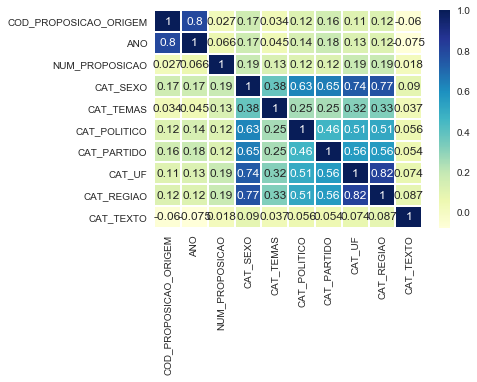

In [79]:
sns.heatmap(corr_df_prop.corr(), cmap='YlGnBu',linecolor='white',linewidths=1, annot=True)